In [52]:
import pandas as pd
import numpy as np
import pickle
import glob
import time
import seaborn as sns
import pywt
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
df_train = pd.read_pickle('../features/train__000__raw_data.pkl')
df_test = pd.read_pickle('../features/test__000__raw_data.pkl')
target = pd.read_pickle('../features/target__000__raw_data.pkl')

In [5]:
df_train = pd.concat([df_train, target[['lifespan']]], axis=1)

In [9]:
def plot_trend_features(df, column, num):
    plt.figure(figsize=(11,8))
    for i, grp in df.groupby(['EngineID', 'Flight Regime']):
        plt.plot(grp['lifespan'], grp[column], linewidth=0.1)
    plt.xlabel('lifespan')
    plt.ylabel(str(num) + '_' + column)
    plt.show()

In [10]:
col_list = list(df_train.columns)

In [31]:
from operator import itemgetter
list(itemgetter(5, 6, 7, 12, 14, 17, 18, 19, 20, 23, 24)(col_list))

['T24 Total temperature at LPC outlet ｰR',
 'T30 Total temperature at HPC outlet ｰR',
 'T50 Total temperature at LPT outlet ｰR',
 'Nc Physical core speed rpm',
 'Ps30 Static pressure at HPC outlet psia',
 'NRc Corrected core speed rpm',
 'BPR Bypass Ratio --',
 'farB Burner fuel-air ratio --',
 'htBleed (Bleed Enthalpy)',
 'W31 HPT coolant bleed lbm/s',
 'W32 LPT coolant bleed lbm/s']

In [24]:
col_list[1:3]

['Mach #', 'Flight Regime']

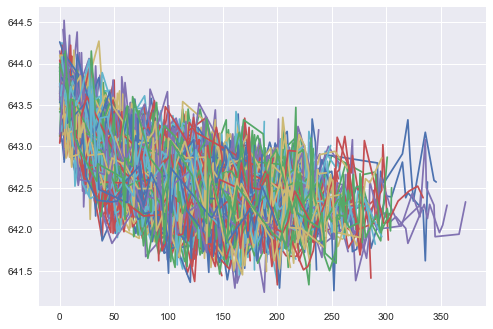

In [53]:
df_train1 = df_train[df_train['Flight Regime'] ==1]
for i, grp in df_train1.groupby('EngineID'):
    plt.plot(grp['lifespan'], grp['T24 Total temperature at LPC outlet ｰR'])
plt.show()

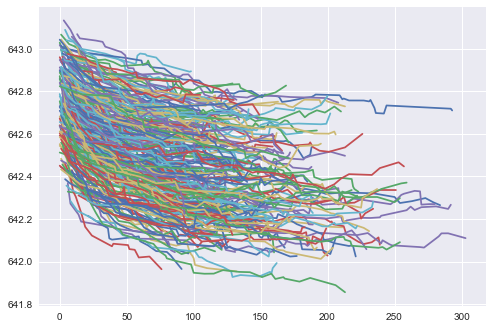

In [45]:
df_train1 = df_train[df_train['Flight Regime'] ==1]
for i, grp in df_train1.groupby('EngineID'):
    plt.plot(grp['lifespan'], grp['T24 Total temperature at LPC outlet ｰR'].rolling(30, min_periods=10).mean())
plt.show()

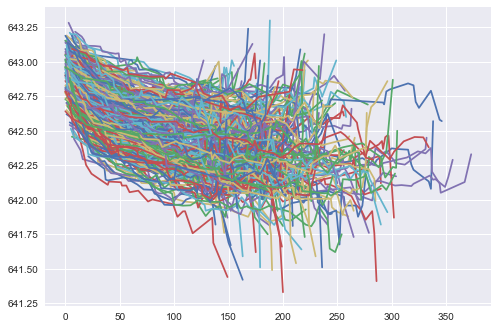

In [88]:
df_train1 = df_train[df_train['Flight Regime'] ==1]
for i, grp in df_train1.groupby('EngineID'):
    plt.plot(grp['lifespan'], grp['T24 Total temperature at LPC outlet ｰR'].ewm(span=30).mean())
plt.show()

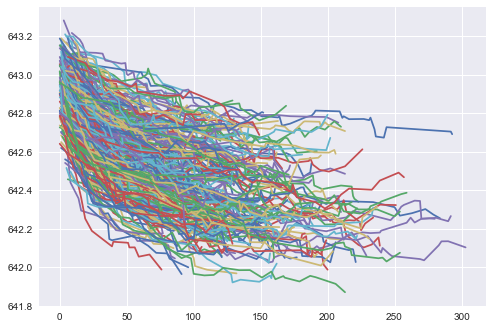

In [89]:
df_train1 = df_train[df_train['Flight Regime'] ==1]
for i, grp in df_train1.groupby('EngineID'):
    plt.plot(grp['lifespan'], grp['T24 Total temperature at LPC outlet ｰR'].ewm(span=30, min_periods=10).mean())
plt.show()

In [ ]:
 grp['T24 Total temperature at LPC outlet ｰR'].ewm(span=30, min_periods=10).mean()

min_period 適当だとノイズ混じったままになりそう